In [12]:
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator as idg
ImageDataGenerator = idg
# can upload images in batches, augmentation.
from keras.models import Sequential
from keras import layers
from keras.layers import Flatten, Dense, Conv2D, MaxPooling2D
from keras import optimizers

In [13]:
train_datagen = idg(rescale = 1/255)
# vertical_flip =true, horizontal_flip =true
validation_datagen = idg(rescale = 1/255)
test_datagen = idg(rescale = 1/255)

In [14]:
# Read the training sample and set the batch size for target size
train_generator = train_datagen.flow_from_directory(
    'plant_village/train',
    target_size = (64, 64),
    batch_size = 16,
    class_mode = 'categorical'
)

Found 3002 images belonging to 4 classes.


In [15]:
# Read the validation sample and set the batch size for target size
validation_generator = validation_datagen.flow_from_directory(
    'plant_village/val',
    target_size = (64, 64),
    batch_size = 16,
    class_mode = 'categorical'
)

Found 635 images belonging to 4 classes.


In [16]:
# Read the test sample and set the batch size for target size
test_generator = test_datagen.flow_from_directory(
    'plant_village/test',
    target_size = (64, 64),
    batch_size = 16,
    class_mode = 'categorical'
)

Found 546 images belonging to 4 classes.


KeyboardInterrupt: 

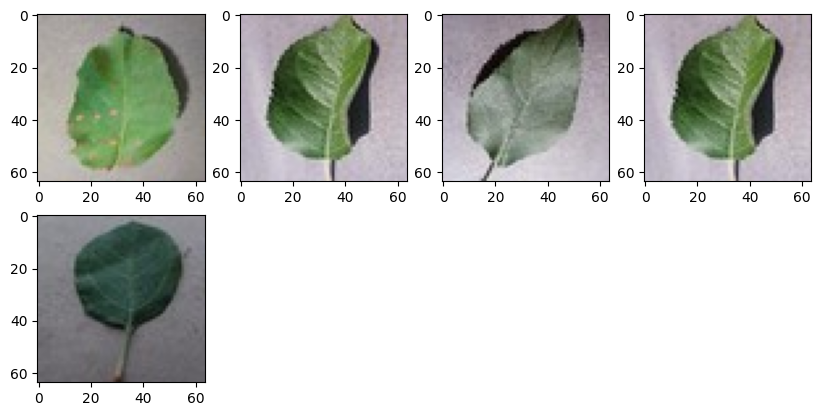

In [17]:
plt.figure(figsize=(10, 10))
for i in range(1, 17):
    plt.subplot(4, 4, i)
    img, label = test_generator.next()
    plt.imshow(img[0])
plt.show()

In [ ]:
img[0].shape

(64, 64, 3)

In [ ]:
from keras.applications.vgg16 import VGG16
basemodel = VGG16(weights="imagenet", include_top=False, input_shape=(64, 64, 3))
basemodel.trainable=False
basemodel.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 64, 64, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 64, 64, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 32, 32, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 32, 32, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 32, 32, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 16, 16, 128)       0     

In [ ]:
Flatten_layer = layers.GlobalAveragePooling2D()
Prediction_layer = layers.Dense(4, activation="Softmax")
modelNew = Sequential([basemodel, Flatten_layer, Prediction_layer])
modelNew.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 2, 2, 512)         14714688  
                                                                 
 global_average_pooling2d (G  (None, 512)              0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 4)                 2052      
                                                                 
Total params: 14,716,740
Trainable params: 2,052
Non-trainable params: 14,714,688
_________________________________________________________________


# Create the Model

In [ ]:
model = Sequential()
model.add(Conv2D(16, kernel_size = (3, 3), strides = 1, padding = 'valid', activation = 'relu', input_shape = (64, 64, 3)))
model.add(Conv2D(32, kernel_size = (3, 3), strides = 1, padding = 'valid', activation = 'relu'))
model.add(Conv2D(64, kernel_size = (3, 3), strides = 1, padding = 'valid', activation = 'relu'))
model.add(Conv2D(64, kernel_size = (3, 3), strides = 1, padding = 'valid', activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, kernel_size = (3, 3), strides = 1, padding = 'valid', activation = 'relu'))
model.add(Conv2D(128, kernel_size = (3, 3), strides = 1, padding = 'valid', activation = 'relu'))
model.add(Conv2D(256, kernel_size = (3, 3), strides = 1, padding = 'valid', activation = 'relu'))
model.add(Conv2D(256, kernel_size = (3, 3), strides = 1, padding = 'valid', activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(256, activation = 'relu'))
model.add(layers.Dense(128, activation = 'relu'))
model.add(layers.Dense(4, activation = 'softmax'))
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 16)        448       
                                                                 
 conv2d_1 (Conv2D)           (None, 60, 60, 32)        4640      
                                                                 
 conv2d_2 (Conv2D)           (None, 58, 58, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 56, 56, 64)        36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 28, 28, 64)       0         
 )                                                               
                                                                 
 conv2d_4 (Conv2D)           (None, 26, 26, 128)       73856     
                                                      

In [18]:
modelNew.compile(optimizer=optimizers.Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['acc'])

# Train the model
history = modelNew.fit(train_generator,
                    steps_per_epoch=train_generator.samples/train_generator.batch_size,
                    epochs=5,
                    validation_data=validation_generator,
                    validation_steps=validation_generator.samples/validation_generator.batch_size,
                    verbose=1) #type:ignore

Epoch 1/5
187/187 [==============================] - 112s 594ms/step - loss: 0.8936 - acc: 0.6602 - val_loss: 0.6426 - val_acc: 0.8142
Epoch 2/5
134/187 [====================>.........] - ETA: 25s - loss: 0.6065 - acc: 0.8181

KeyboardInterrupt: 

In [ ]:
model.compile(optimizer=optimizers.Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['acc'])

# Train the model
history = model.fit(train_generator,
                    steps_per_epoch=train_generator.samples/train_generator.batch_size,
                    epochs=5,
                    validation_data=validation_generator,
                    validation_steps=validation_generator.samples/validation_generator.batch_size,
                    verbose=1) #type:ignore